Initial Data Loading and Cleaning

In [5]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [7]:
#opening pickle file of augmented added data
with open('../data/external/combined_augmented_data_v2.pkl','rb') as f:
    X_train,y_train,X_test,y_test = pickle.load(f)

In [8]:
#printing shapes 
print(f'X_train Shape: {X_train.shape}')
print(f'y_train Shape: {y_train.shape}')
print(f'X_test Shape: {X_test.shape}')
print(f'y_test Shape: {y_test.shape}')

X_train Shape: (109820, 28, 28)
y_train Shape: (109820,)
X_test Shape: (28688, 28, 28)
y_test Shape: (28688,)


In [9]:
#define image resolution 
res = (28,28)

The training dataset consists of 27455 28x28 pixel grayscale images, including the associated label, as well as an additional 27455 28x28 augmented images, using the keras.preprocessing.image.ImageDataGenerator function. This is meant to increase the diversity of the data to prevent overfitting found in the original dataset. The testing dataset consists of 7172 28x28 images and 7172 28x28 augmented images. The label and pixels are split into X and y for both training and testing data.

The below is a function to find the indices of a specified label.

In [10]:
#fuction to find the indices given a label 
def find_indices(data,label):
    #check if data is numpy array
    if type(data) == np.ndarray:
        #return indices
        return np.where(data==label)
    #check if data is pandas series 
    elif type(data) == pd.Series:
        #return indices
        return data[data==label].index
    #else not supported in this function
    else:
        raise Exception('Not supported data type for this function.')

Creating a dictionary where key is the numeric label in the dataset and value is the corresponding letter.

In [12]:
#letters
letters = ['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y']
#numbers 
numbers = sorted(list(np.unique(y_train.astype(int))))
#dictionary of labels 
labels = dict(zip(numbers,letters))

Inspecting examples for each letter in the dataset.

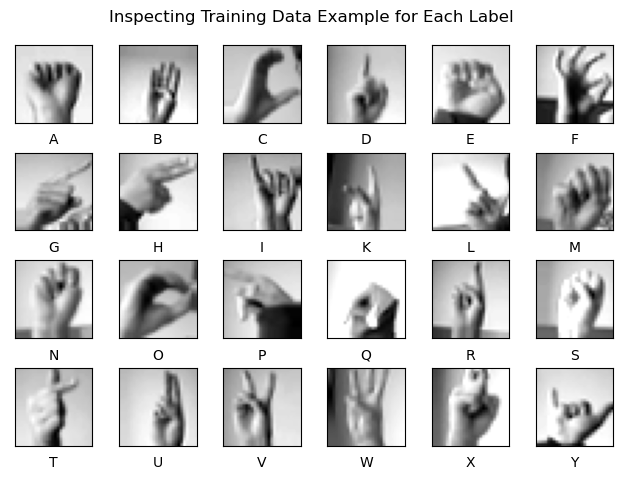

In [13]:
#visualization of dataset 
fig, ax = plt.subplots(4,6)
fig.suptitle('Inspecting Training Data Example for Each Label')
ax = ax.ravel()
pos = 0 

#loop through each label in dataset 
for label in range(0,26):
    #if label is not included in dataset 
    if label in [9,25]:
        continue
    #find first index of label
    idx = find_indices(y_train,label)[0][0]
    #display first found image 
    ax[pos].imshow(X_train[idx],cmap='gray')
    #set x label as dataset label
    ax[pos].set(xlabel=labels[label])
    #do not show ticks 
    ax[pos].set_xticks([])
    ax[pos].set_yticks([])
    #increment for subplotting 
    pos+=1

plt.tight_layout()
plt.show()

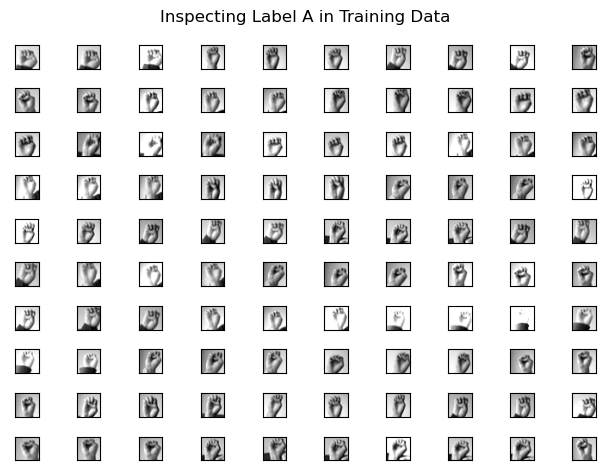

In [14]:
#visualization of dataset 
fig, ax = plt.subplots(10,10)
plt.suptitle('Inspecting Label A in Training Data')
ax = ax.ravel()
pos = 0 

label = 4

index = find_indices(y_train,label)[0]

#loop through each label in dataset 
for i, idx in enumerate(index):
    if i >= 100:
        break
    #display first found image 
    ax[pos].imshow(X_train[idx],cmap='gray')
    #do not show ticks 
    ax[pos].set_xticks([])
    ax[pos].set_yticks([])
    #increment for subplotting 
    pos+=1

plt.tight_layout()
plt.show()

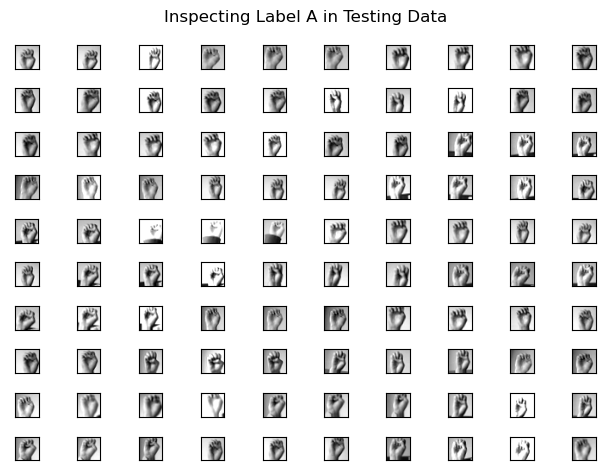

In [15]:
#visualization of dataset 
fix, ax = plt.subplots(10,10)
plt.suptitle('Inspecting Label A in Testing Data')
ax = ax.ravel()
pos = 0 

label = 4

index = find_indices(y_test,label)[0]

#loop through each label in dataset 
for i, idx in enumerate(index):
    if i >= 100:
        break
    #display first found image 
    ax[pos].imshow(X_test[idx],cmap='gray')
    #do not show ticks 
    ax[pos].set_xticks([])
    ax[pos].set_yticks([])
    #increment for subplotting 
    pos+=1

plt.tight_layout()
plt.show()

In [18]:
# Reshape the data to (num_samples, 784)
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
y_train = y_train
y_test = y_test
# Print the shapes of the augmented data
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (109820, 784)
y_train shape: (109820,)
X_test shape: (28688, 784)
y_test shape: (28688,)


### EDA
we can look how image will looks like for each class if we average it. for that we can take avegare valuse of each pixel across all observation.

To take the average image for each class, we can group the training data by label and then calculate the mean of each pixel across all observations with the same label.


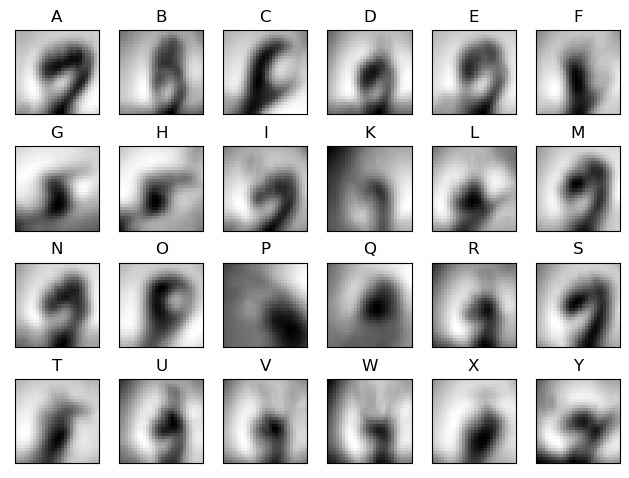

In [19]:
# Groupping the training data by label and calculate the mean of each pixel across all observations with the same label
mean_images = pd.DataFrame(X_train).groupby(y_train).mean()

# Plotting the average image for each class
fig, ax = plt.subplots(4, 6)
ax = ax.ravel()
for i, (letter, image) in enumerate(mean_images.iterrows()):
    ax[i].imshow(np.array(image).reshape(28,28), cmap='gray')
    ax[i].set_title(labels[letter])
    ax[i].set_xticks([])
    ax[i].set_yticks([])

plt.tight_layout()
plt.show()


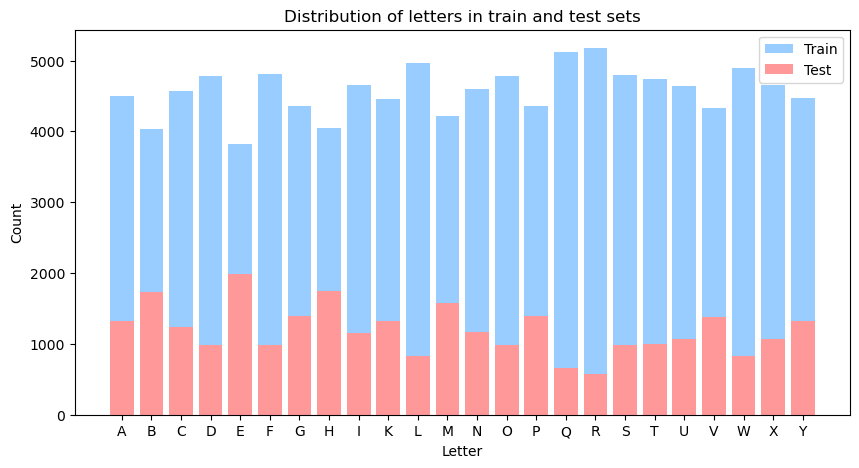

In [26]:
# create empty dictionaries to store the counts for each letter
train_counts = {}
test_counts = {}

# loop through each letter
for letter in letters:
    # find the indices of the letter in the train and test sets
    train_indices = find_indices(y_train, numbers[letters.index(letter)])
    test_indices = find_indices(y_test, numbers[letters.index(letter)])
    
    # count the number of occurrences of the letter in the train and test sets
    train_count = len(train_indices[0])
    test_count = len(test_indices[0])
    
    # store the counts in the dictionaries
    train_counts[letter] = train_count
    test_counts[letter] = test_count

# set the RGB values for the pastel blue and pastel red colors
pastel_blue = (153/255, 204/255, 255/255)
pastel_red = (255/255, 153/255, 153/255)

# create a bar chart of the letter counts
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(train_counts.keys(), train_counts.values(), label='Train', color=pastel_blue)
ax.bar(test_counts.keys(), test_counts.values(), label='Test', color=pastel_red)
ax.set_xlabel('Letter')
ax.set_ylabel('Count')
ax.set_title('Distribution of letters in train and test sets')
ax.legend()
plt.show()